# **Connected Components and Disjoint Set Forests**

# **Connected Components**

A connected component C in an undirected graph G=(V,E) is the set of vertices in V such that every vertex in C is connected to every other vertex in C and is not connected to any vertex not in C.

For example, in the graph below, vertices {0,2,4}  are a connected component and vertices {1,3,5} are another connected component.

We say that the graph has two connected components: {0,2,4}  and {1,3,5} 

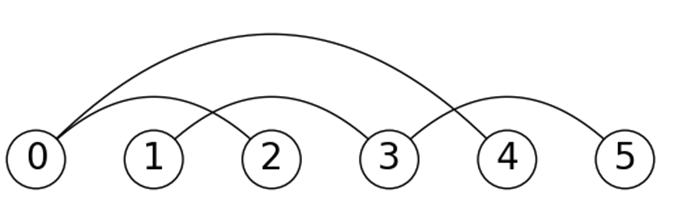

**Algorithm:**


```
Connected components(G)
   Create a list S with|V| sets, each containing one vertex in V
   For every edge (u,v) in E
        If u and v belong to different sets, merge u’s set and v’s set
   Return S
```


**Naive Implementation:**

In [ ]:
def initialize_sets(n):
  S = [set([i]) for i in range(n)]
  return S

def find(S,a):
    for j,s in enumerate(S):
        if a in s:
            return j

def union(S,a,b):
    sa = find(S,a)
    sb = find(S,b)
    if sa!=sb:
        S[sa] = S[sa].union(S[sb]) # S[sa] now contains the combined elements of a's set and b's set
        S.pop(sb) 

def connected_components(G,trace=False):
    S = initialize_sets(len(G.AL))
    for v in range(len(G.AL)):
        for edge in G.AL[v]:
            if v < edge.dest: # For efficiency, consider every edge only once
                union(S,v,edge.dest)
                if trace:
                    print('processing edge ({},{})'.format(v,edge.dest))
                    print('List of sets:',S)
    return S 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import graph_AL
import numpy as np

def random_graph(nv,ne):
  G =  graph_AL.Graph(nv)
  edges = set()
  while len(edges) < ne:
    source = np.random.randint(nv)
    dest = (np.random.randint(1,nv)+source)%nv
    if source>dest:
      source, dest = dest, source
    edges.add((source,dest))  
  for edge in edges:
    G.insert_edge(edge[0],edge[1] )
  return G

In [ ]:
np.random.seed(0)
G = random_graph(8,5)
G.draw()
G.display()

In [ ]:
C = connected_components(G,trace=True)
print(C)

Running times:

**find** - each set membership query can be answered in O(1) time, but we need to examine all sets in the list, of which we have at most |V|, thus the running time is O(|V|).

**union** - each call to find takes O(|V|) time, thus union takes takes O(|V|).

**connected components** - processing each edge requires a call to union. Since we have |E| edges, the total runnning time is O(|V||E|).

We can actually do much better than this using a **disjoint set forest**. 


# **Disjoint set forests**

**Definition:**

A disjoint set forests is a set of trees, where every tree represents a set of vertices.

For the example above, the forest would consist of 3 trees, one representing the equivalence class {0, 2, 3, 4}, another representing the equivalence class {1, 5, 6}, and another representing the equivalence class {7}. 

**Representation:**

1. Every tree represents a set
2. References in a tree go from children to parent
3. A tree’s root acts as the representative member of its set

**Operations:**
-	**find(S,a)** - Follow the references from a to the root of the tree where it is stored 
-	**union(S,a,b)** - Make the root of a's tree point to the root if b's tree

**Implementation:**

Since each item has a single reference (a reference to its parent), we can represent a disjoint set forest using a list of integers as follows:

parent(i) = -1 if i is the root of a tree
parent(i) = parent of i otherwise


For example, the list of sets [{0, 2, 3, 4}, {1, 5, 6}, {7}] could be encoded as by the following disjoint set forest.

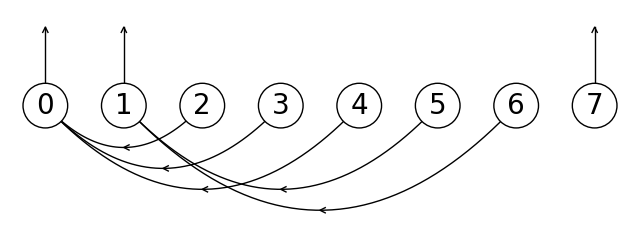

The parent list representing the DSF would be *parent=[-1,-1,0,0,0,1,1,-1]*


Here's the class that implements the union and find

In [1]:
class DSF:
    # Constructor
    def __init__(self, n_sets):
        # Creates forest with 'n_sets' root nodes
        self.parent = [-1 for i in range(n_sets)]

    def find(self,i):
        # Returns root of tree that i belongs to
        if self.parent[i]<0:
            return i
        return self.find(self.parent[i])

    def union(self,i,j):
        # Joins i's tree and j's tree if they are different
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j: # i and j already belong to the same set
            self.parent[root_j] = root_i

    def set_list(self):
        # Returns a list containing the elements of each set
        set_dict = {i:set([i]) for i in range(len(self.parent)) if self.parent[i]<0}
        for i in range(len(self.parent)):
          if self.parent[i]>=0:
              set_dict[self.find(i)].add(i)
        return [set_dict[x] for x in set_dict]
 

In [ ]:
def connected_components(G,trace=False):
    S = DSF(len(G.AL))
    for v in range(len(G.AL)):
        for edge in G.AL[v]:
            if v < edge.dest:
                S.union(v,edge.dest)
                if trace:
                  print('processing edge ({},{})'.format(v,edge.dest))
                  print('Disjoint set forest:',S.parent)
    return S.set_list()

In [ ]:
C = connected_components(G,trace=True)
print(C)

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

class DSF:
    # Constructor
    def __init__(self, n_sets):
        # Creates forest with 'n_sets' root nodes
        self.parent = [-1 for i in range(n_sets)]

    def find(self,i):
        # Returns root of tree that i belongs to
        if self.parent[i]<0:
            return i
        return self.find(self.parent[i])

    def union(self,i,j):
        # Joins i's tree and j's tree if they are different
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j: # i and j already belong to the same set
            self.parent[root_j] = root_i

    def set_list(self):
        # Returns a list containing the elements of each set
        set_dict = {i:set([i]) for i in range(len(self.parent)) if self.parent[i]<0}
        for i in range(len(self.parent)):
          if self.parent[i]>=0:
              set_dict[self.find(i)].add(i)
        return [set_dict[x] for x in set_dict]

    def draw(self,title=''):
        scale = 30
        figsize = [6.4, 2.4]
        if len(self.parent)>8:
            figsize[0] = 6.4*len(self.parent)/8
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(len(self.parent)):
            if self.parent[i]<0:
                ax.plot([i*scale,i*scale],[0,scale],linewidth=1,color='k')
                ax.plot([i*scale-1,i*scale,i*scale+1],[scale-2,scale,scale-2],linewidth=1,color='k')
            else:
                x = np.linspace(i*scale,self.parent[i]*scale)
                x0 = np.linspace(i*scale,self.parent[i]*scale,num=5)
                diff = np.abs(self.parent[i]-i)
                if diff == 1:
                    y0 = [0,0,0,0,0]
                else:
                    y0 = [0,-6*diff,-8*diff,-6*diff,0]
                f = interp1d(x0, y0, kind='cubic')
                y = f(x)
                ax.plot(x,y,linewidth=1,color='k')
                ax.plot([x0[2]+2*np.sign(i-self.parent[i]),x0[2],x0[2]+2*np.sign(i-self.parent[i])],[y0[2]-1,y0[2],y0[2]+1],linewidth=1,color='k')
            ax.text(i*scale,0, str(i), size=20,ha="center", va="center",
             bbox=dict(facecolor='w',boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        if len(title)>0:
            fig.suptitle(title, fontsize=16)
        else:
            plt.tight_layout()


In [ ]:
def connected_components(G,trace=False):
    S = DSF(len(G.AL))
    for v in range(len(G.AL)):
        for edge in G.AL[v]:
            if v < edge.dest:
                S.union(v,edge.dest)
                if trace:
                  print('processing edge ({},{})'.format(v,edge.dest))
                  print('Disjoint set forest:',S.parent)
                  S.draw()
    return S.set_list()

C = connected_components(G,trace=True)
print(C)

**Running times:**

find - the running time is the length of the path from an item to its root.

union - the function calls find twice and performs an additional constant number of operations.  

In the worst case, the length of the path from an item to its root will be O(|V|), thus the running time is O(|V|). 

However, with a very sligth modification to the find operation, we can reduce the running time to O(1) for all graphs of resonable size (smaller that the total number of atoms in the universe).


Consider the following operations:

[1, 2, 3, 4, 5, 6, 7, -1]


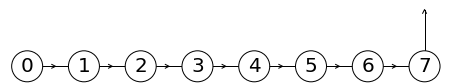

In [2]:
S = DSF(8)
for i in range(1,8):
    S.union(i,i-1)

print(S.parent)
S.draw()


S.find(0) would need to traverse the whole tree, following n-1 references, thus taking O(n) time.

But, after we determine that the root of item 0 is 7, we could modify the forest so parent[0] would point directly to 7.

Thus future calls to S.find(0) would take constant time. 


In [3]:
s.parent[0] = 7
s.draw()

NameError: name 's' is not defined

Moreover, we could make all items in the path from 0 to the root point to the root directly once it is found.

This operation is called path compression and is implemented as follows:

In [ ]:
def find(self,i):
    # Returns root of tree that i belongs to
    if self.parent[i]<0:
        return i
    root =  self.find(self.parent[i])
    self.parent[i] = root
    return root

In [5]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

class DSF:
    # Constructor
    def __init__(self, n_sets):
        # Creates forest with 'n_sets' root nodes
        self.parent = [-1 for i in range(n_sets)]

    def find(self,i):
       # Returns root of tree that i belongs to
        if self.parent[i]<0:
            return i
        root = self.find(self.parent[i])
        self.parent[i] = root
        return root

    def union(self,i,j):
        # Joins i's tree and j's tree if they are different
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j: # i and j already belong to the same set
            self.parent[root_j] = root_i

    def set_list(self):
        # Returns a list containing the elements of each set
        set_dict = {i:set([i]) for i in range(len(self.parent)) if self.parent[i]<0}
        for i in range(len(self.parent)):
          if self.parent[i]>=0:
              set_dict[self.find(i)].add(i)
        return [set_dict[x] for x in set_dict]

    def draw(self,title=''):
        scale = 30
        figsize = [6.4, 2.4]
        if len(self.parent)>8:
            figsize[0] = 6.4*len(self.parent)/8
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(len(self.parent)):
            if self.parent[i]<0:
                ax.plot([i*scale,i*scale],[0,scale],linewidth=1,color='k')
                ax.plot([i*scale-1,i*scale,i*scale+1],[scale-2,scale,scale-2],linewidth=1,color='k')
            else:
                x = np.linspace(i*scale,self.parent[i]*scale)
                x0 = np.linspace(i*scale,self.parent[i]*scale,num=5)
                diff = np.abs(self.parent[i]-i)
                if diff == 1:
                    y0 = [0,0,0,0,0]
                else:
                    y0 = [0,-6*diff,-8*diff,-6*diff,0]
                f = interp1d(x0, y0, kind='cubic')
                y = f(x)
                ax.plot(x,y,linewidth=1,color='k')
                ax.plot([x0[2]+2*np.sign(i-self.parent[i]),x0[2],x0[2]+2*np.sign(i-self.parent[i])],[y0[2]-1,y0[2],y0[2]+1],linewidth=1,color='k')
            ax.text(i*scale,0, str(i), size=20,ha="center", va="center",
             bbox=dict(facecolor='w',boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        if len(title)>0:
            fig.suptitle(title, fontsize=16)
        else:
            plt.tight_layout()

[-1, -1, -1, -1, -1, -1, -1, -1]
[1, 2, 3, 4, 5, 6, 7, -1]
[7, 7, 7, 7, 7, 7, 7, -1]


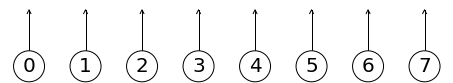

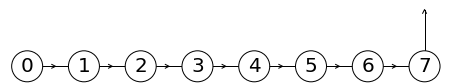

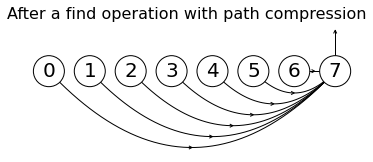

In [6]:
s = DSF(8)
print(s.parent)
s.draw()

for i in range(1,8):
    s.union(i,i-1)

print(s.parent)
s.draw()

s.find(0)
print(s.parent)
s.draw('After a find operation with path compression')


The technique above is known as path compression and ensures that O(n) operations are extremely rare. 

A complete analysis of path compression is beyond the scope of this course, but it results in **O(1)** average running times for union and find operation under all reasobanle situations. 

One more idea: union by size

We we join two sets, we normally make the root of the second tree point to the root of the first tree. 

Consider the following example:


In [ ]:
s = DSF(8)
print(s.parent)
s.draw()
for i in range(1,7):
    s.union(i,i-1)
s.draw()

If we perform S.union(S,7,0), we would make the root of 0's tree (6) point to the root of 7's tree (7).

If we perform S.union(S,0,7), we would make the root of 7's tree (7) point to the root of 0's tree (6).

Which is preferable?

S.union(S,7,0) will increase the path length to a root for 7 items (0,1,2,3,4,5,6)

S.union(S,0,7) will increase the path length to a root for 1 item (7)

Thus S.union(S,0,7) is preferable.

In [ ]:
s = DSF(8)
print(s.parent)
for i in range(1,7):
    s.union(i,i-1)
s.draw()
s.union(7,0)
s.draw()

In [ ]:
s = DSF(8)
print(s.parent)
for i in range(1,7):
    s.union(i,i-1)
s.draw()
s.union(0,7)
s.draw()

In union by rank, we keep track of the size of the trees and always make the root of the smaller tree point to the root of the larger tree, thus increaseing the path length for a smaller number of items.

To implement this, we modify the replesentation as follows:

When i is a root, parent[i] = -(number of items in tree that has i as root)

The in the union operation, we use the value of parent[root_i] and parent[root_j] to determine which root should be modified and then update the size of the resulting tree. 

All other operations remain unchanged. 


In [ ]:
def union(self,i,j):
    # Joins i's tree and j's tree if they are different
    # Makes root of smaller tree point to root of larget tree
    root_i = self.find(i)
    root_j = self.find(j)
    if root_i != root_j:
        if self.parent[root_i]<self.parent[root_j]:
            self.parent[root_i] += self.parent[root_j]
            self.parent[root_j] = root_i
        else:
            self.parent[root_j] += self.parent[root_i]
            self.parent[root_i] = root_j

The complete code:

In [4]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

class DSF:
    # Constructor
    def __init__(self, n_sets):
        # Creates forest with 'n_sets' root nodes
        self.parent = [-1 for i in range(n_sets)]

    def find(self,i):
       # Returns root of tree that i belongs to
        if self.parent[i]<0:
            return i
        root = self.find(self.parent[i])
        self.parent[i] = root
        return root

    def union(self,i,j):
        # Joins i's tree and j's tree if they are different
        # Makes root of smaller tree point to root of larget tree
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j:
            if self.parent[root_i]<self.parent[root_j]:
                self.parent[root_i] += self.parent[root_j]
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] += self.parent[root_i]
                self.parent[root_i] = root_j

    def set_list(self):
        # Returns a list containing the elements of each set
        set_dict = {i:set([i]) for i in range(len(self.parent)) if self.parent[i]<0}
        for i in range(len(self.parent)):
          if self.parent[i]>=0:
              set_dict[self.find(i)].add(i)
        return [set_dict[x] for x in set_dict]

    def draw(self,title=''):
        scale = 30
        figsize = [6.4, 2.4]
        if len(self.parent)>8:
            figsize[0] = 6.4*len(self.parent)/8
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(len(self.parent)):
            if self.parent[i]<0:
                ax.plot([i*scale,i*scale],[0,scale],linewidth=1,color='k')
                ax.plot([i*scale-1,i*scale,i*scale+1],[scale-2,scale,scale-2],linewidth=1,color='k')
            else:
                x = np.linspace(i*scale,self.parent[i]*scale)
                x0 = np.linspace(i*scale,self.parent[i]*scale,num=5)
                diff = np.abs(self.parent[i]-i)
                if diff == 1:
                    y0 = [0,0,0,0,0]
                else:
                    y0 = [0,-6*diff,-8*diff,-6*diff,0]
                f = interp1d(x0, y0, kind='cubic')
                y = f(x)
                ax.plot(x,y,linewidth=1,color='k')
                ax.plot([x0[2]+2*np.sign(i-self.parent[i]),x0[2],x0[2]+2*np.sign(i-self.parent[i])],[y0[2]-1,y0[2],y0[2]+1],linewidth=1,color='k')
            ax.text(i*scale,0, str(i), size=20,ha="center", va="center",
             bbox=dict(facecolor='w',boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        if len(title)>0:
            fig.suptitle(title, fontsize=16)
        else:
            plt.tight_layout()

Send your TA or IA a message saying "I found the DSF Easter Egg" and you'll get 5 extra credit points for your next assignment. 

Here's an example:

[-1, -1, -1, -1, -1, -1, -1, -1]
[-2, 0, -1, -1, -1, -1, -1, -1]
[-3, 0, 0, -1, -1, -1, -1, -1]
[-4, 0, 0, 0, -1, -1, -1, -1]
[-5, 0, 0, 0, 0, -1, -1, -1]
[-6, 0, 0, 0, 0, 0, -1, -1]
[-7, 0, 0, 0, 0, 0, 0, -1]
[-8, 0, 0, 0, 0, 0, 0, 0]


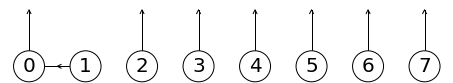

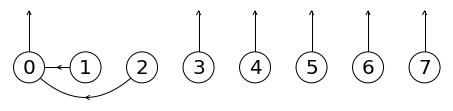

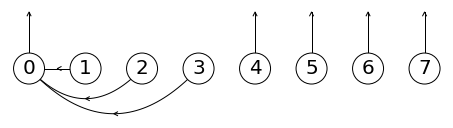

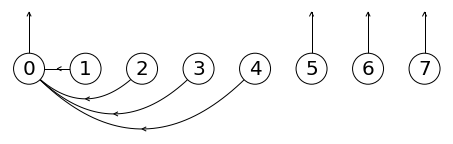

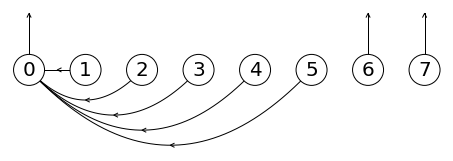

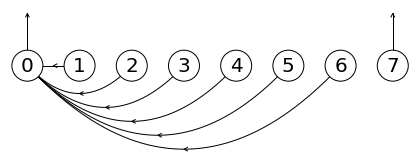

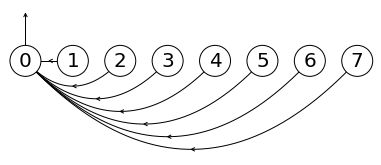

In [5]:
s = DSF(8)
print(s.parent)
for i in range(1,8):
    s.union(i,i-1)
    print(s.parent)
    s.draw()


**Example 1:** Write a function that receives a disjoint set forest S and returns the number of sets encoded in S.

In [ ]:
def num_sets(S):
    count =0
    for p in S.parent:
        if p<0:
          count +=1
    return count

**Example 2:** Write a function that receives an integer n and returns a disjoint set forest where all even numbers belong to one set and all odd numbers belong to another set.


In [6]:
def even_odd(n):
    S = DSF(n)
    for i in range(n):
      S.union(i,i%2)
    return S

[-4, -3, 0, 1, 0, 1, 0]


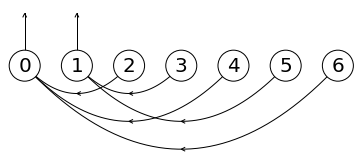

In [8]:
S=even_odd(7)
print(S.parent)
S.draw()

Another implementation without union operations

In [ ]:
def even_odd(n):
    S = DSF(n)
    S.parent = list(np.arange(n)%2)
    S.parent[1] = -(n//2)
    S.parent[0] = -n - S.parent[1]
    return S

In [ ]:
S=even_odd(7)
print(S.parent)
S.draw()